AUTHOR - SARANG TAMRAKAR...

EMAIL - sarang.tamrakarsgi15@gmail.com

# PROBLEM STATEMENT...

#                                               Zomato Restaurants Analysis

### The basic idea is analyzing the Buisness Problem of Zomato to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

### plan of this notebook..

1. understanding the basic about data (like... shape,dtypes etc..)
2. handling missing values...
3. some transformation of data

4. understanding the data through visuliazation + statistics....

5. do train test split...

### Feature Engineering

6. handling categorical feature...

7. feature selection..

8. model selection

9. model evalution using different performance metrics..

10. model hyperparameter_tuning for better score..

11. save the model...(in physical file so that we can reuse it even after shutdown our jupyter.. ) again load the model for prediction...

12. Then GO TO PYCHARM BUILD PROJECT......

In [2]:
zomato = pd.read_csv("zomato.csv")

# basic information...

In [3]:
# glance of data 
zomato.head(20)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [4]:
# shape
zomato.shape

(51717, 17)

In [5]:
# info..
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
# dtypes
zomato.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
# checking unique values..

for col in zomato.columns:
    nunique = zomato[col].nunique()
    print(col,"++++++++++",nunique,"\n\n")

url ++++++++++ 51717 


address ++++++++++ 11495 


name ++++++++++ 8792 


online_order ++++++++++ 2 


book_table ++++++++++ 2 


rate ++++++++++ 64 


votes ++++++++++ 2328 


phone ++++++++++ 14926 


location ++++++++++ 93 


rest_type ++++++++++ 93 


dish_liked ++++++++++ 5271 


cuisines ++++++++++ 2723 


approx_cost(for two people) ++++++++++ 70 


reviews_list ++++++++++ 22513 


menu_item ++++++++++ 9098 


listed_in(type) ++++++++++ 7 


listed_in(city) ++++++++++ 30 




In [8]:
# checking duplicated values
print(zomato.duplicated().sum())
print("no duplicates presents")

0
no duplicates presents


In [9]:
# drop unnecessory columns..
zomato = zomato.drop(labels=["url","address","name","phone","reviews_list"],axis=1)

In [10]:
# null value checking..
missing_val = zomato.isnull().sum()
missing_pct = zomato.isnull().mean()
missing_df = pd.DataFrame({"val":missing_val,"pct":missing_pct})
missing_df

,val,pct
online_order,0,0.000000
book_table,0,0.000000
rate,7775,0.150337
votes,0,0.000000
location,21,0.000406
rest_type,227,0.004389
dish_liked,28078,0.542916
cuisines,45,0.000870
approx_cost(for two people),346,0.006690
menu_item,0,0.000000


### there are 3 types of features present 

1. missing pct is greater than 50 ....................(dish_liked)
2. missing pct is less than 50 ................(rate,location,rest_type,cuisines)
3. label column === approx_cost(for two people)



### plan to filling mising values..
1. we will drop those rows where approx_cost(for two people) is nan..
2. where missing values are greater than 50% we are using substitute method 
3. else filling missing values based on dtypes.. 


In [11]:
# make list of those columns..
substitute_col_list = ["dish_liked"]
mode_col_list = ["rate","location","rest_type","cuisines"]

In [12]:
class handling_missing:
    
    def __init__(self):
        pass
    
    
    def dropping(self,df,var):
        
        """ for label column """
        try:
            df = df.dropna(subset=[var])
            return df
        
        except Exception as e:
            print("error occured ",e)
        
    
    
    def substitute_nan(self,df,var):
        """for missing pct is greater than 50"""
        try:
            df[var] = np.where(df[var].isnull(),"MISS",df[var])
            return df
        
        except Exception as e:
            print("error occured :",e)
    
    
    
    def impute_mode(self,df,var):
        """for missing pct is lesser than 50"""
        try:
            df[var] = df[var].fillna(df[var].mode()[0])
            return df
        except Exception as e:
            print("error occured ",e)
            
            
            
            
            

In [13]:
obj = handling_missing()

In [14]:
# missing value in label column
zomato = obj.dropping(zomato,"approx_cost(for two people)")

# impute missing value for missing pct is greater than 50
for col in substitute_col_list:
    zomato = obj.substitute_nan(zomato,col)

# impute missing value for missing pct is lesser than 50
for col in mode_col_list:
    zomato = obj.impute_mode(zomato,col)

In [15]:
# null value checking..
missing_val = zomato.isnull().sum()
missing_pct = zomato.isnull().mean()
missing_df = pd.DataFrame({"val":missing_val,"pct":missing_pct})
missing_df

,val,pct
online_order,0,0.0
book_table,0,0.0
rate,0,0.0
votes,0,0.0
location,0,0.0
rest_type,0,0.0
dish_liked,0,0.0
cuisines,0,0.0
approx_cost(for two people),0,0.0
menu_item,0,0.0


## some transformation...

In [16]:
# change col name
zomato.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type_restaurent","listed_in(city)":"city"},inplace=True)

In [17]:
# do transformation on rate..
zomato["rate"] = zomato["rate"].apply(lambda x: x.replace("/5",""))
zomato = zomato[zomato["rate"] != "NEW"]
zomato = zomato[zomato["rate"] != "-"].reset_index(drop=True)

In [18]:
# correct data format..
zomato["votes"] = zomato["votes"].astype("int")
zomato["cost"] = zomato["cost"].apply(lambda x : x.replace(",",""))
zomato["cost"] = zomato["cost"].astype("int")

## Visualiazation

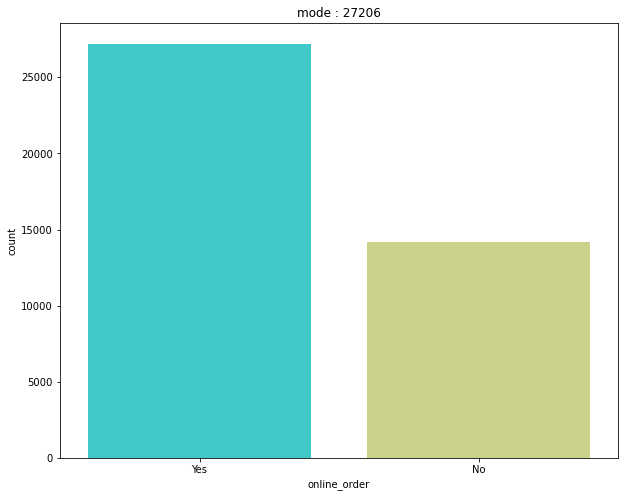

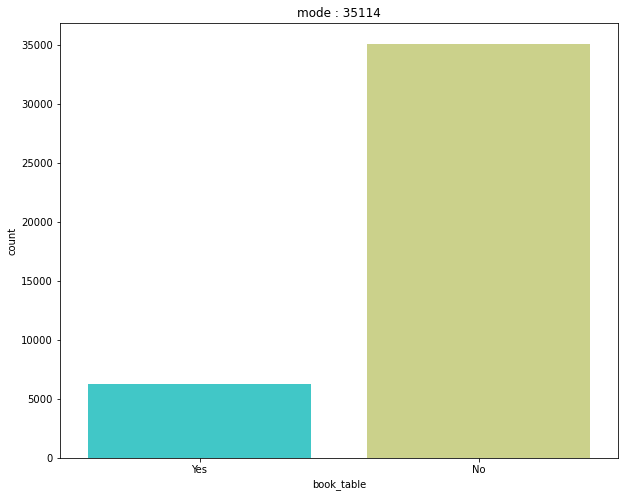

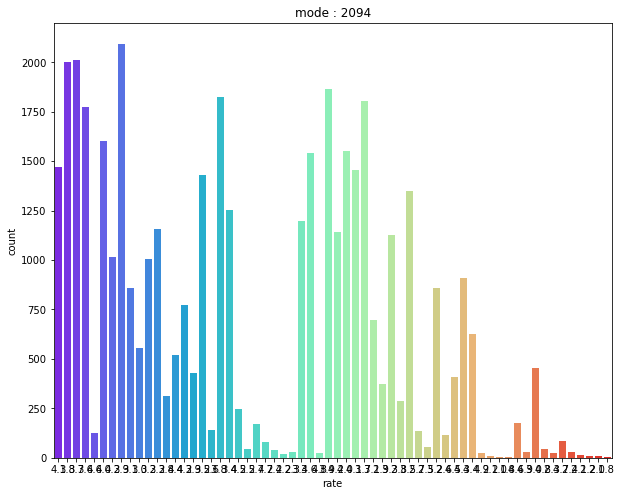

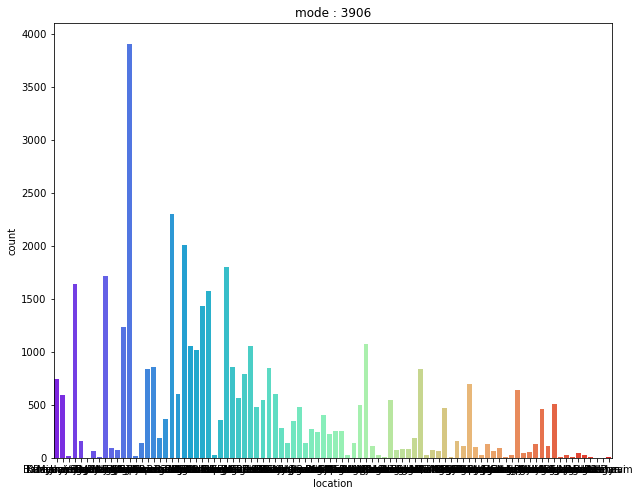

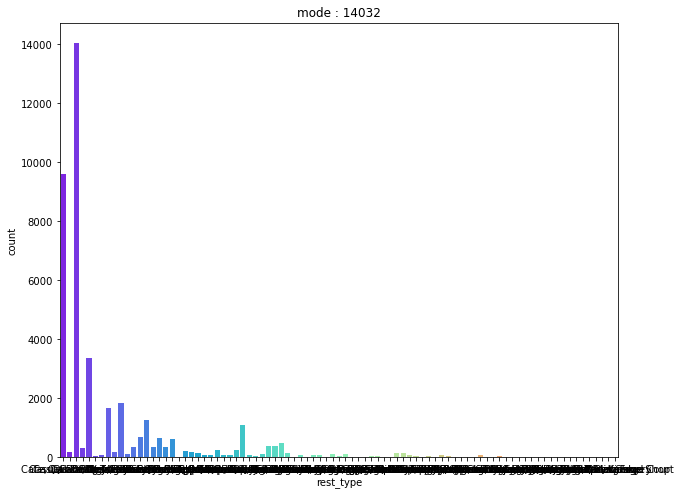

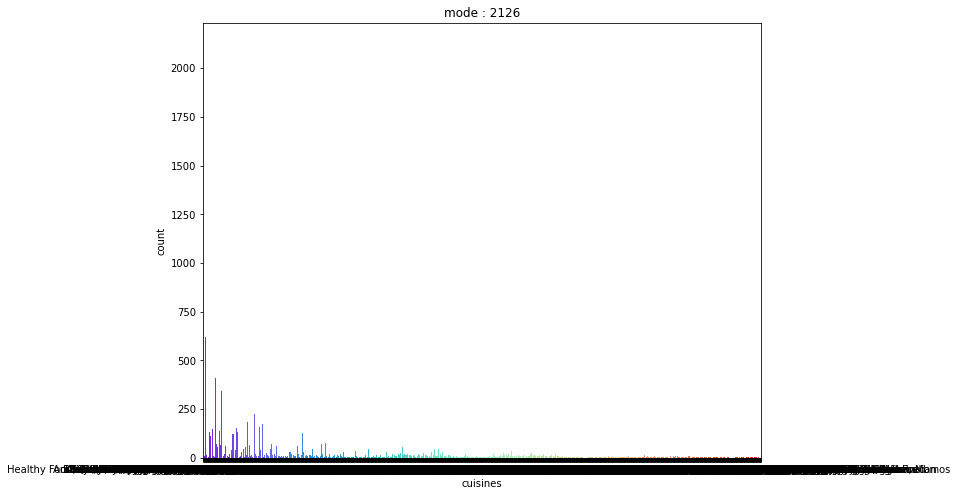

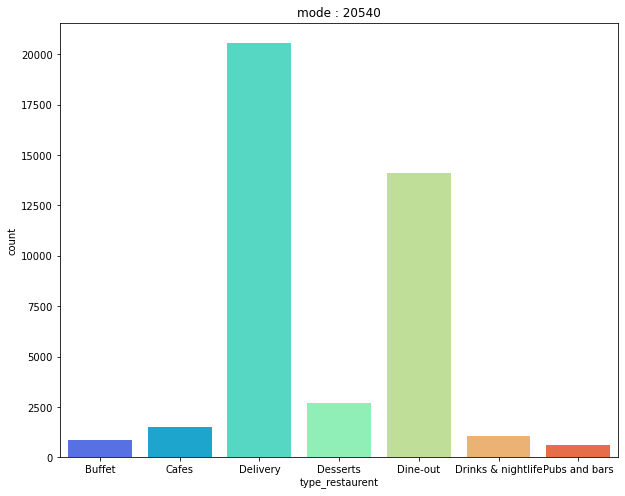

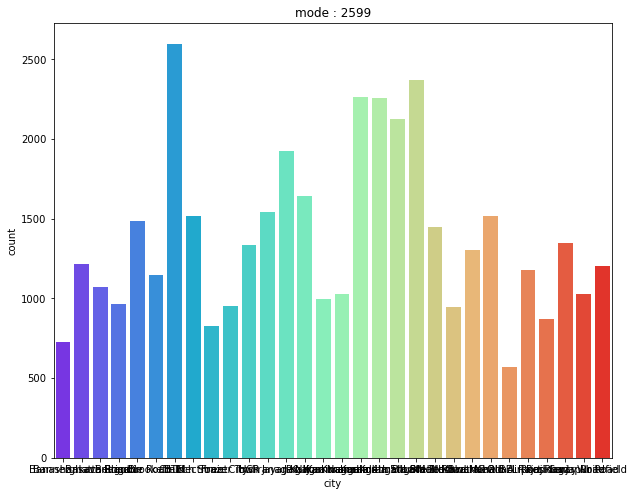

In [19]:
# countplot..
for col in ["online_order","book_table","rate","location","rest_type","cuisines","type_restaurent","city"]:
    plt.figure(figsize=(10,8))
    sns.countplot(col,data=zomato,palette="rainbow")
    count = zomato[col].value_counts()[0]
    plt.title("mode : "+str(count))
    plt.show()

In [20]:
for col in ["online_order","book_table","rate","location","rest_type","cuisines","type_restaurent","city"]:
    count = zomato[col].value_counts()
    print(count,"\n\n")

Yes    27206
No     14212
Name: online_order, dtype: int64 


No     35114
Yes     6304
Name: book_table, dtype: int64 


3.9     2094
3.7     2009
3.8     2001
3.9     1867
3.8     1824
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: rate, Length: 62, dtype: int64 


BTM                      3906
Koramangala 5th Block    2297
HSR                      2004
Indiranagar              1803
JP Nagar                 1717
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64 


Quick Bites                   14032
Casual Dining                  9616
Cafe                           3369
Dessert Parlor                 1850
Delivery                       1671
                              ...  
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Bakery, Food Court               

### we have seen countplot for categorical feature ....

there are so many categories present in each cat feature

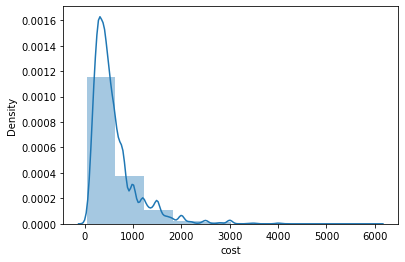

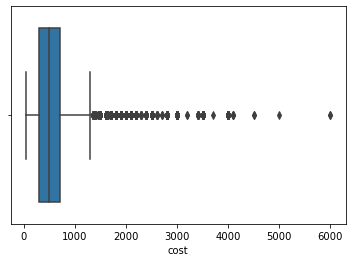

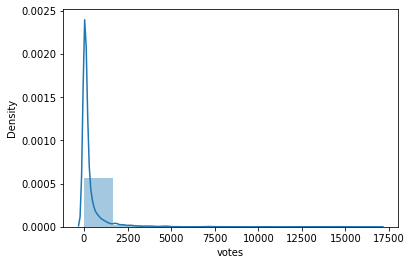

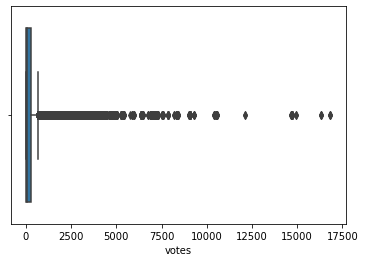

In [21]:
for col in ["cost","votes"]:
    sns.distplot(zomato[col],bins=10)
    plt.show()
    sns.boxplot(zomato[col])
    plt.show()

### huge outliers presents in dataset we will handle it in feature engineering section...

In [22]:
# barplot of categories..with dataset

<Figure size 576x576 with 0 Axes>

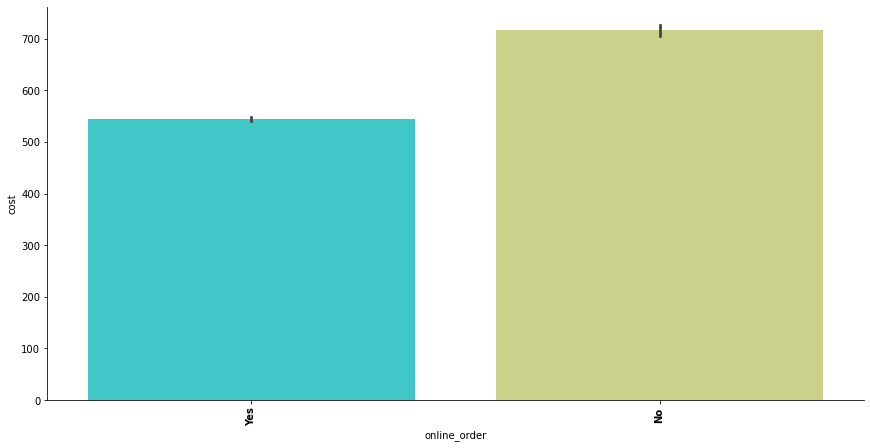

<Figure size 576x576 with 0 Axes>

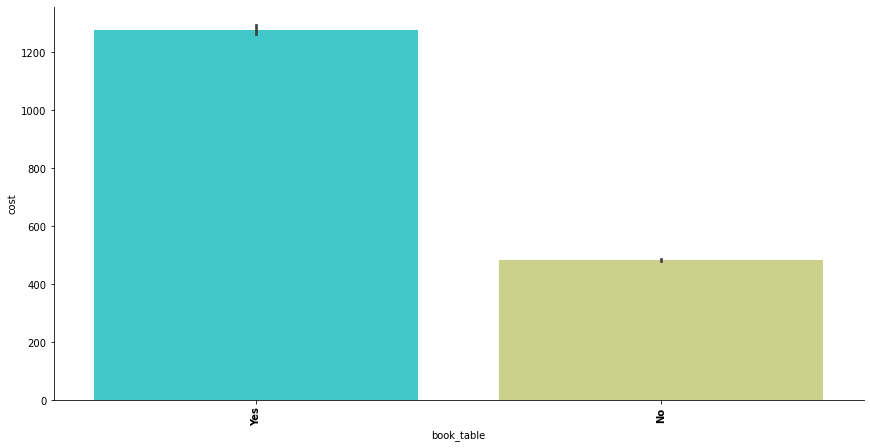

<Figure size 576x576 with 0 Axes>

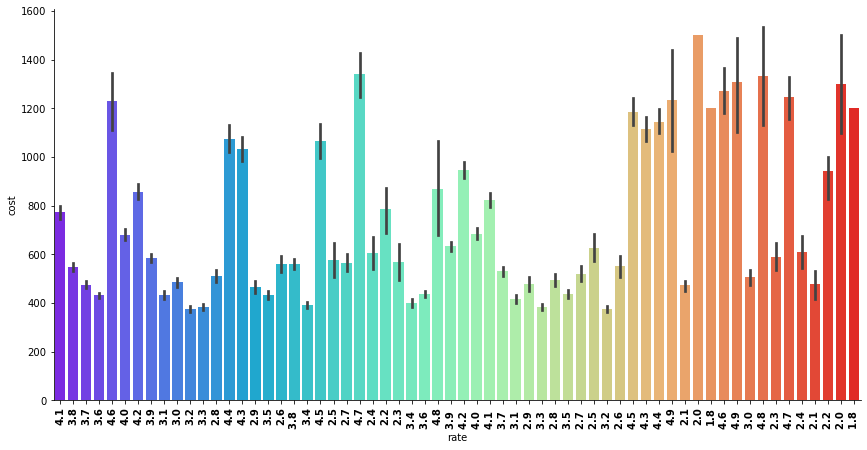

<Figure size 576x576 with 0 Axes>

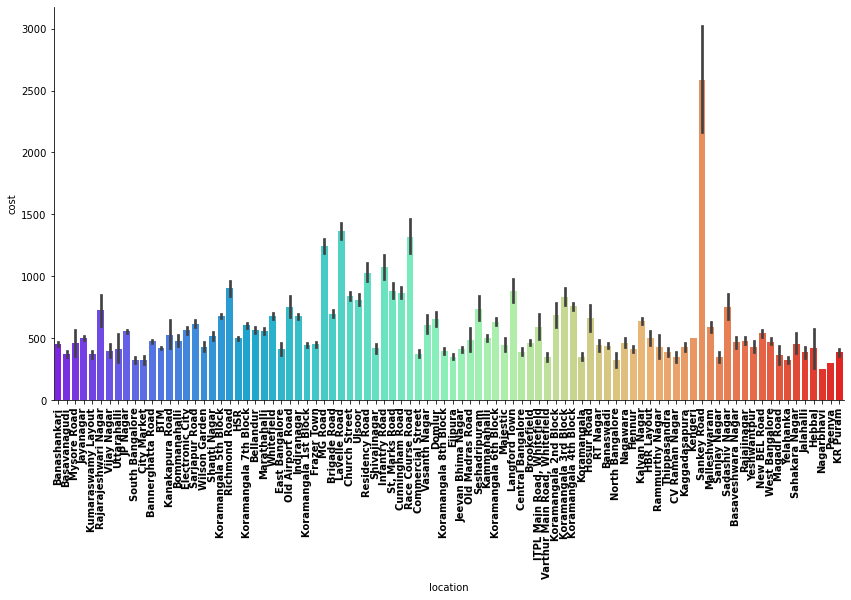

<Figure size 576x576 with 0 Axes>

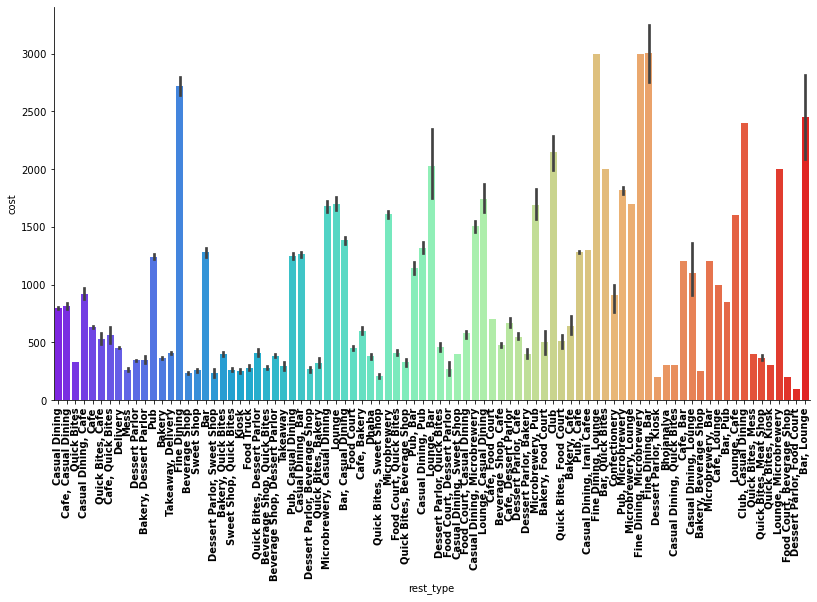

<Figure size 576x576 with 0 Axes>

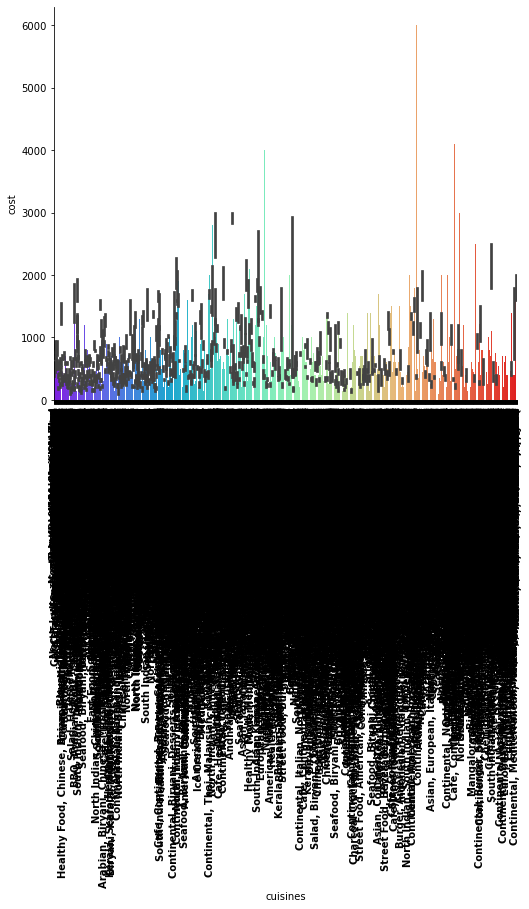

<Figure size 576x576 with 0 Axes>

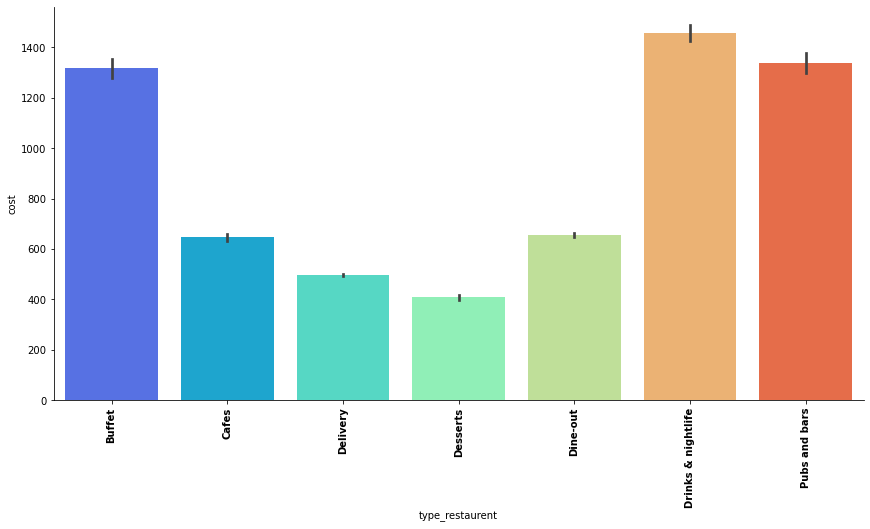

<Figure size 576x576 with 0 Axes>

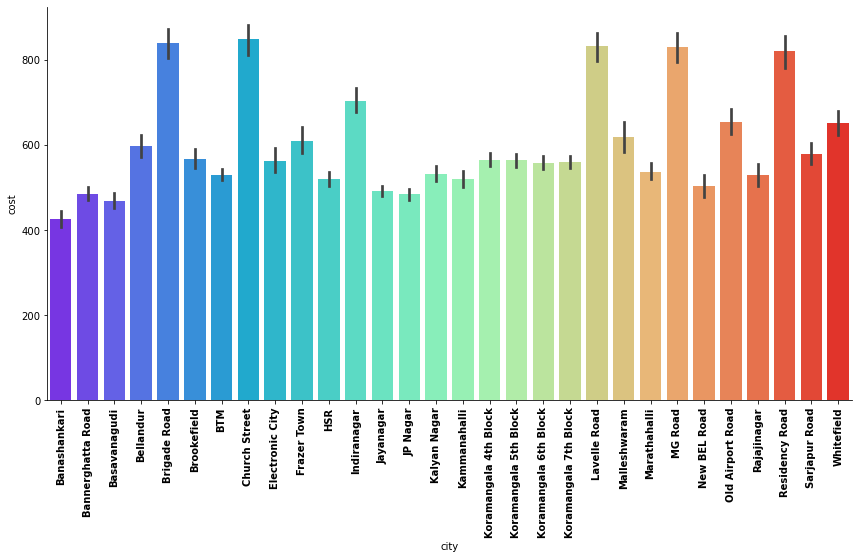

In [23]:
for col in ["online_order","book_table","rate","location","rest_type","cuisines","type_restaurent","city"]:
    plt.figure(figsize=(8,8))
    sns.catplot(x=col,y="cost",data=zomato,palette="rainbow",height=6,aspect=2,kind="bar")
    plt.xticks(fontsize=10,fontweight="bold",rotation=90)
    plt.show()

In [24]:
# boxplot of categories..with dataset

<Figure size 576x576 with 0 Axes>

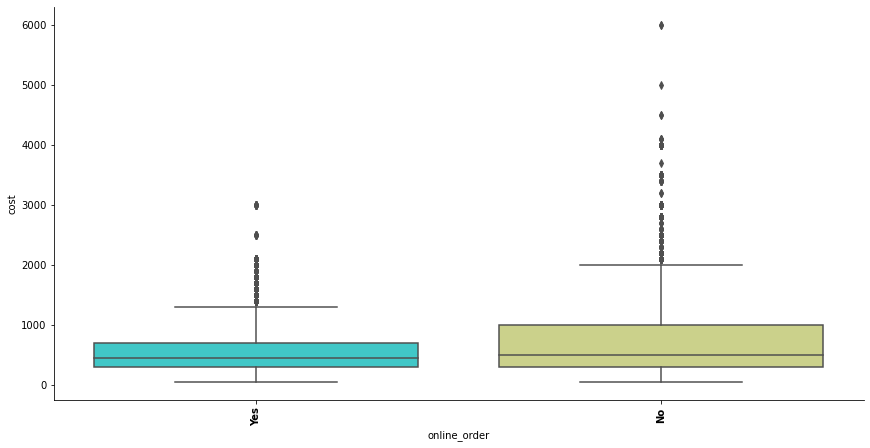

<Figure size 576x576 with 0 Axes>

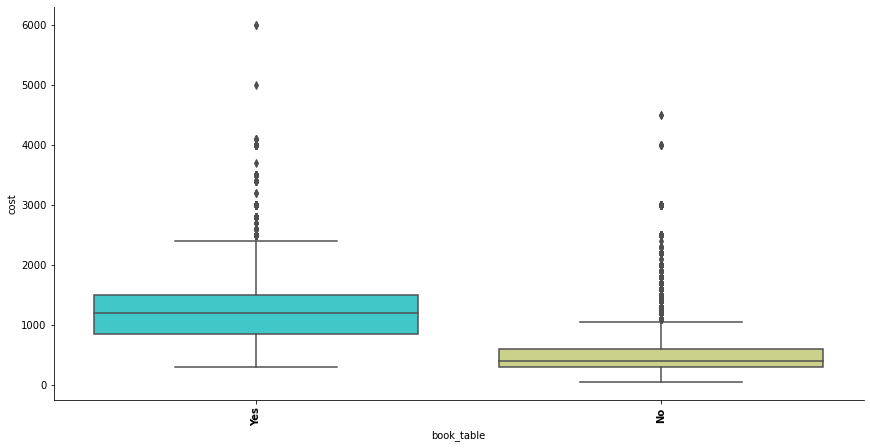

<Figure size 576x576 with 0 Axes>

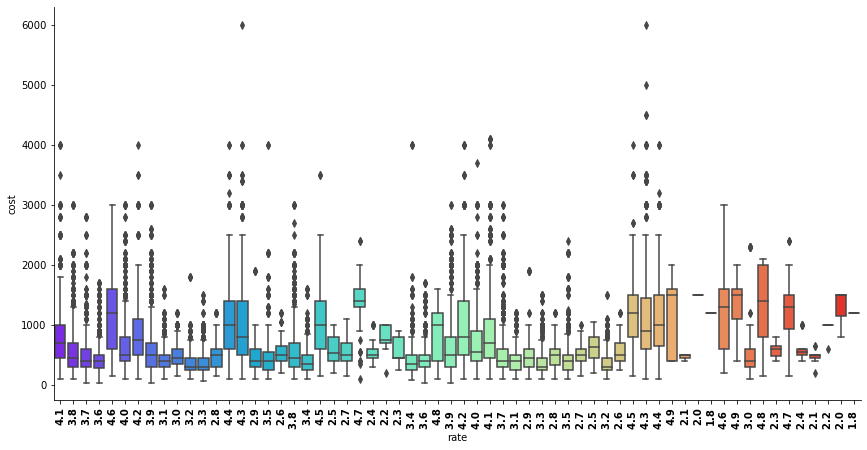

<Figure size 576x576 with 0 Axes>

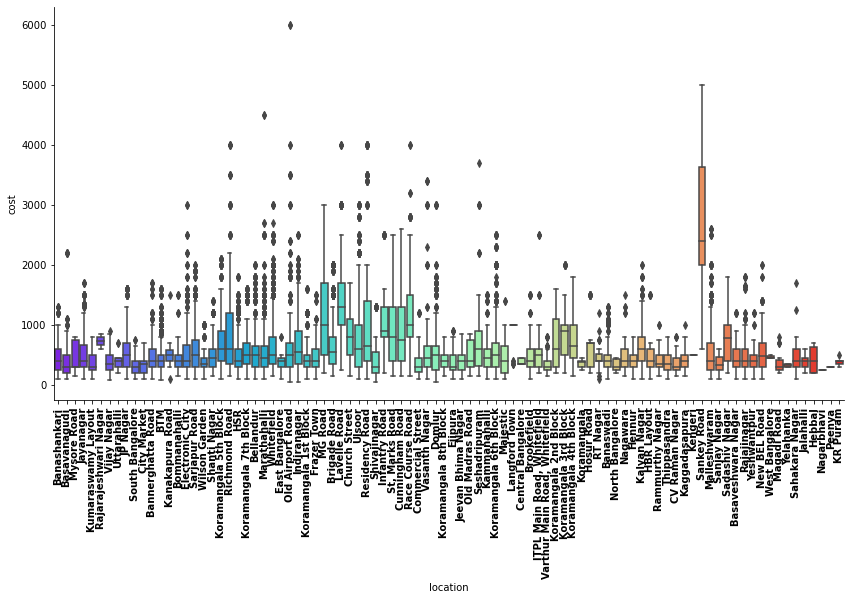

<Figure size 576x576 with 0 Axes>

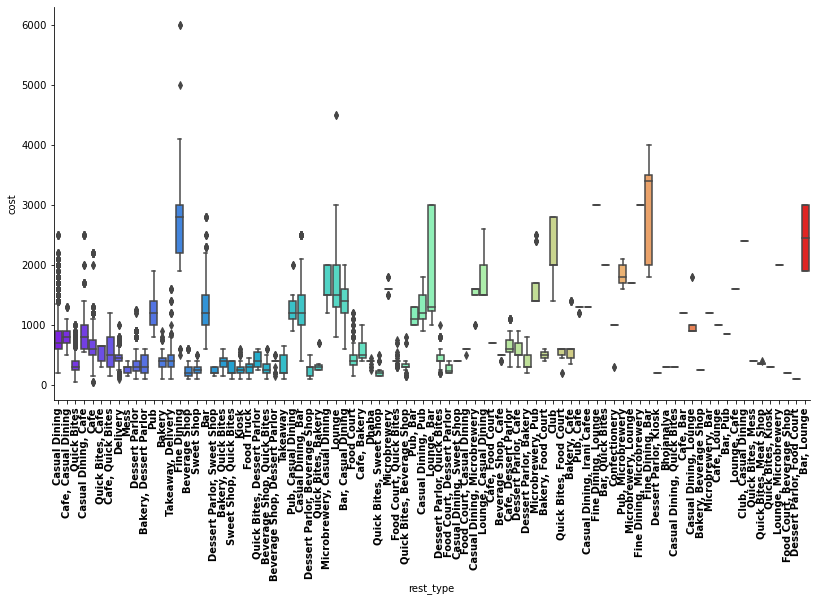

<Figure size 576x576 with 0 Axes>

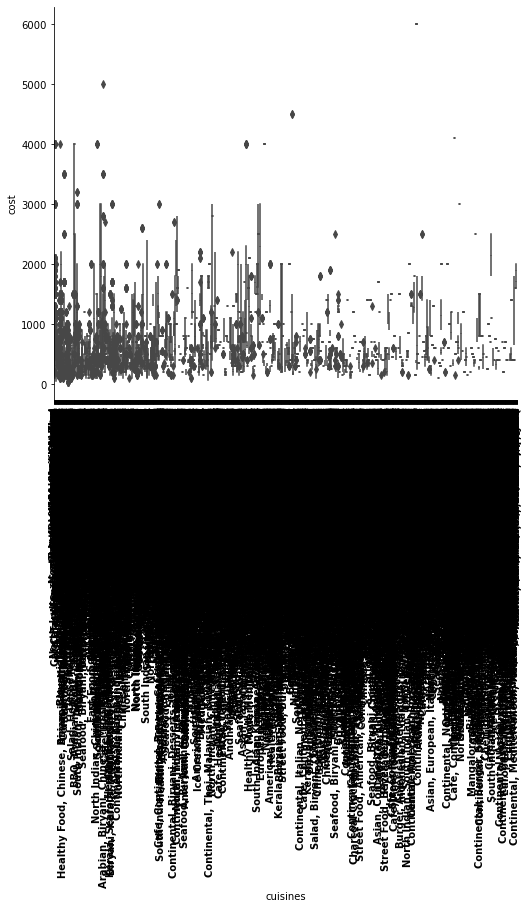

<Figure size 576x576 with 0 Axes>

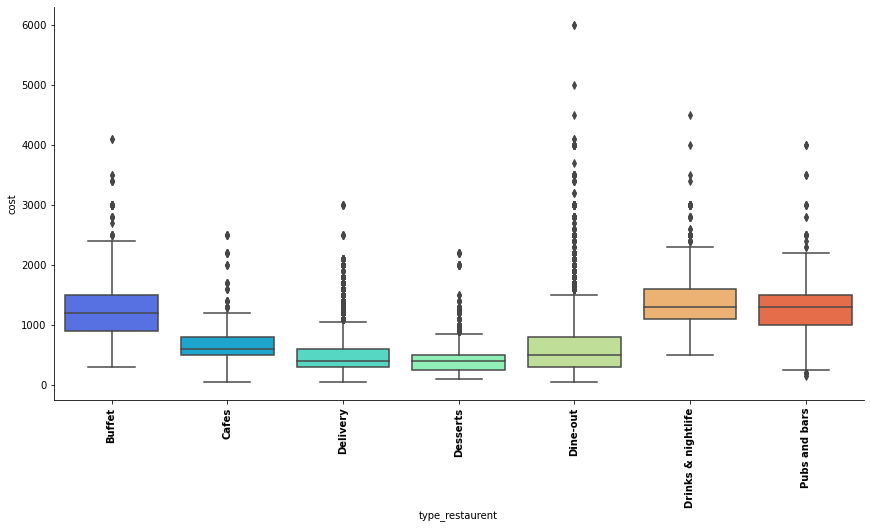

<Figure size 576x576 with 0 Axes>

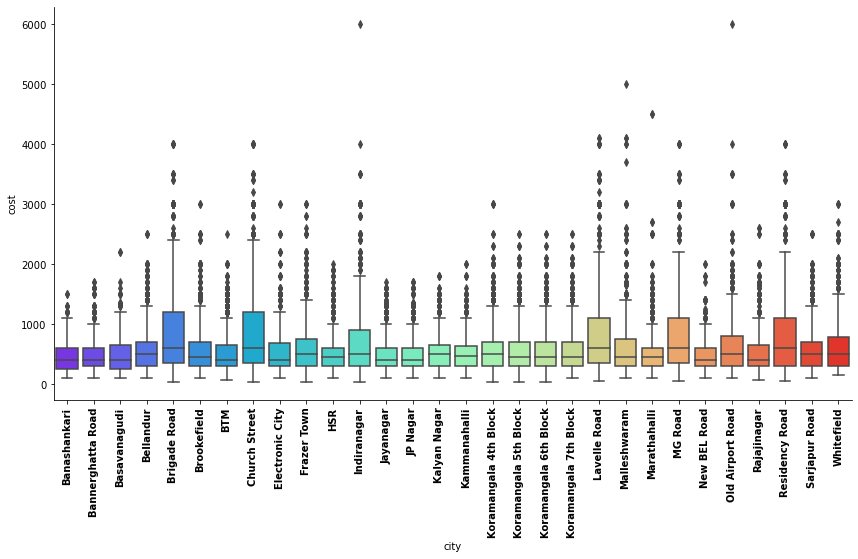

In [25]:
for col in ["online_order","book_table","rate","location","rest_type","cuisines","type_restaurent","city"]:
    plt.figure(figsize=(8,8))
    sns.catplot(x=col,y="cost",data=zomato,palette="rainbow",height=6,aspect=2,kind="box")
    plt.xticks(fontsize=10,fontweight="bold",rotation=90)
    plt.show()

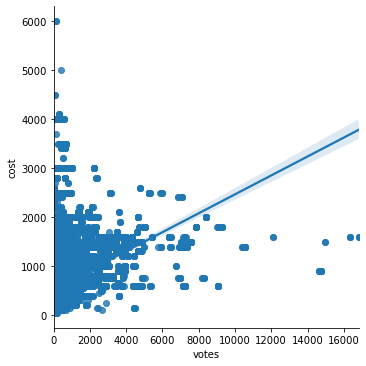

In [26]:
sns.lmplot(x="votes",y="cost",data=zomato)

### train test split..

In [27]:
### train test split..
from sklearn.model_selection import train_test_split

x = zomato.drop(labels=["cost"],axis=1)
y = zomato["cost"]

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=11)

In [29]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(31063, 11) (31063,) (10355, 11) (10355,)


In [30]:
for cat in xtrain.columns:
    if xtrain[cat].nunique()>10:
        print(xtrain[cat].nunique())

62
2145
91
87
4872
2320
6463
30


# handling categorical values....

In [31]:
cat_cols = ['online_order','book_table','location','rest_type','dish_liked','cuisines','menu_item','type_restaurent','city']

In [32]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [33]:
class handling_cat:
    def __init__(self):
        pass
    
    
    
    def encode_two_cat_train(self,df,var):
        try:
            enc = LabelEncoder()
            enc.fit(df[var])
            pickle.dump(enc,open("two_cat_enc"+str(var)+".pickle","wb"))
            df[var] = enc.transform(df[var])
            return df
        except Exception as e:
            
            print("error",e)
            
            
            
    def encode_two_cat_test(self,df,var):
        try:
            enc = pickle.load(open("two_cat_enc"+str(var)+".pickle","rb"))
            df[var] = enc.transform(df[var])
            return df
        except Exception as e:
            
            print("error",e)
            
            
    
            
    def top10_one_hot(self,df,var,NoOf_cat):
        try:
            top_10 = list(df[var].value_counts().sort_values(ascending=False).head(NoOf_cat).index)
            for cat in top_10:
                df[cat] = list(np.where(df[var]==cat,1,0))
            
            new_df = df.drop(labels=[var],axis=1)
            return new_df
        except Exception as e:
            print("error",e)

In [34]:
obj = handling_cat()

In [35]:
for col in ["online_order","book_table","type_restaurent"]:
    xtrain = obj.encode_two_cat_train(xtrain,col)

for col in ["online_order","book_table","type_restaurent"]:
    xtest = obj.encode_two_cat_test(xtest,col)
    
for col in ["location","rest_type","rate","dish_liked","cuisines","menu_item","city"]:
    xtrain = obj.top10_one_hot(xtrain,col,10)

for col in ["location","rest_type","rate","dish_liked","cuisines","menu_item","city"]:
    xtest = obj.top10_one_hot(xtest,col,10)

# Feature Scalling....

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
class feature_scalling:
    def __init__(self):
        pass
    def scale_xtrain(self,xtrain):
        scaler = StandardScaler()
        scaler.fit(xtrain)
        pickle.dump(scaler,open("standard_scaler.pickle","wb"))
        xtrain_scaled = scaler.transform(xtrain)
        return xtrain_scaled
    
    
    def scale_xtest(self,xtest):
        scale = pickle.load(open("standard_scaler.pickle","rb"))
        xtest_scaled = scale.transform(xtest)
        return xtest_scaled

In [38]:
obj = feature_scalling()

In [39]:
xtrain = obj.scale_xtrain(xtrain)
xtest = obj.scale_xtest(xtest)

In [40]:
#xtrain = pd.DataFrame(xtrain_scaled,columns=xtrain.columns)
#xtest = pd.DataFrame(xtest_scaled,columns=xtest.columns)

In [41]:
np.shape(xtrain)

(31063, 66)

# Feature Selection..

In [42]:
# Feature Selection..
from sklearn.feature_selection import chi2,f_regression,mutual_info_regression,RFE,RFECV,SelectFromModel,SelectKBest
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [43]:
fs = SelectKBest(score_func=f_regression)
fs.fit(xtrain,ytrain)

SelectKBest(score_func=<function f_regression at 0x0000024029EA1CA0>)

In [44]:
fs.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### so will choose only 20 features instead of 66 features & here we will compare the different strategies after that  we will select the best strategy based on performance

In [45]:
class feature_selection:
    
    """this class specially designed for feature selection """
    def __init__(self):
        pass
    
    def performance(self,xtrain,ytrain,xtest,ytest):
        xg_clf = XGBRegressor()
        xg_base_line = xg_clf.fit(xtrain,ytrain)
        ypred = xg_base_line.predict(xtest)
        fscore = r2_score(ytest,ypred)
        
        print("fscore:",fscore)
    
    def chi2(self,xtrain,ytrain,xtest,ytest): # can't use because of Negative values present..
        fs = SelectKBest(score_func=chi2,k=10)
        fs.fit(xtrain,ytrain)
        xtrain_chi = fs.transform(xtrain)
        xtest_chi = fs.transform(xtest)
        result_chi = self.performance(xtrain_chi,ytrain,xtest_chi,ytest)
        return result_chi
    
    def ANOVA(self,xtrain,ytrain,xtest,ytest):
        an = SelectKBest(score_func=f_regression,k=20)
        an.fit(xtrain,ytrain)
        xtrain_ano = an.transform(xtrain)
        xtest_ano = an.transform(xtest)
        result_an = self.performance(xtrain_ano,ytrain,xtest_ano,ytest)
        return result_an
    
    
    def mutual_info(self,xtrain,ytrain,xtest,ytest):
        mu = SelectKBest(score_func=mutual_info_regression,k=20)
        mu.fit(xtrain,ytrain)
        xtrain_mu = mu.transform(xtrain)
        xtest_mu = mu.transform(xtest)
        result_mu = self.performance(xtrain_mu,ytrain,xtest_mu,ytest)
        return result_mu
        
        
    def rfe(self,xtrain,ytrain,xtest,ytest):
        rfe = RFE(estimator=XGBRegressor(),n_features_to_select=20, step=1,)
        rfe.fit(xtrain,ytrain)
        xtrain_rfe = rfe.transform(xtrain)
        xtest_rfe = rfe.transform(xtest)
        result_rfe = self.performance(xtrain_rfe,ytrain,xtest_rfe,ytest)
        return result_rfe
    
    def selectfrommodel_featureimp(self,xtrain,ytrain,xtest,ytest,max_feature):
        xg = XGBRegressor()
        sfm = SelectFromModel(estimator=xg,max_features=max_feature)
        sfm_fit = sfm.fit(xtrain,ytrain)
        xtrain_sfm = sfm_fit.transform(xtrain)
        xtest_sfm = sfm_fit.transform(xtest)
        result_sfm = self.performance(xtrain_sfm,ytrain,xtest_sfm,ytest)
        return result_sfm
    

In [46]:
obj = feature_selection()

In [47]:
# checking with all feature..
_=obj.performance(xtrain,ytrain,xtest,ytest)

fscore: 0.6671864911747141


In [48]:
# checking with chi2
#_=obj.chi2(xtrain,ytrain,xtest,ytest)

In [49]:
# checking with anova...
_=obj.ANOVA(xtrain,ytrain,xtest,ytest)

fscore: 0.6824532204115386


In [50]:
# checking with mutual info..
_=obj.mutual_info(xtrain,ytrain,xtest,ytest)

fscore: 0.6805276212802506


In [51]:
# checking with recursive feature elimination...
_=obj.rfe(xtrain,ytrain,xtest,ytest)

fscore: 0.685169362860026


In [52]:
# checking with feature importance..max feature = 10
_=obj.selectfrommodel_featureimp(xtrain,ytrain,xtest,ytest,30)

fscore: 0.6001777101552517


## Conclusion From feature selection...

1. WE HAVE 66 TATAL FEATURES..
2. WE WILL SELECT ON 20 FEATURES..
3. WE WILL USE RFE METHOD BECAUSE IT IS GIVING US BETTER ACCURACY AS COMAPARED TO WITH ALL FEATURES...

# Final selected strategy..

In [53]:
class feature_final_selection:
    
    def __init__(self):
        pass
    
    def rfe_xtrain(self,xtrain,ytrain):
        rfe = RFE(estimator=XGBRegressor(),n_features_to_select=20, step=1,)
        rfe.fit(xtrain,ytrain)
        pickle.dump(rfe,open("rfe_selection.pickle","wb"))
        xtrain_rfe = rfe.transform(xtrain)
        return xtrain_rfe
        
    def rfe_xtest(self,xtest):
        rfe = pickle.load(open("rfe_selection.pickle","rb"))
        
        xtest_rfe = rfe.transform(xtest)
        return xtest_rfe
    

In [54]:
obj = feature_final_selection()

In [55]:
xtrain_ano = obj.rfe_xtrain(xtrain,ytrain)
xtest_ano = obj.rfe_xtest(xtest)

In [56]:
# model selection..
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import r2_score

In [57]:
class model_selection:
    def __init__(self,xtrain_ano,ytrain,xtest_ano,ytest):
        self.xtrain = xtrain_ano
        self.ytrain = ytrain
        self.xtest = xtest_ano
        self.ytest = ytest
        
    
    def Linear_regression(self):
        logit = LinearRegression().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        score = r2_score(self.ytest,ypred)
        print("linearRegression :",score)
        
    def adaboost(self):
        logit = AdaBoostRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("adaboost:",f_score)
    
    def gradientboost(self):
        logit = GradientBoostingRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("gradientboost:",f_score)
        
    def randomforest(self):
        logit = RandomForestRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("randomforest:",f_score)
        
    def xgboost(self):
        logit = XGBRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("xgboost:",f_score)
        
    def knn(self):
        logit = KNeighborsRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("knn:",f_score)
        
    def svr(self):
        logit = SVR().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("kernelsvr:",f_score)
    
    def Extra_tree(self):
        logit = ExtraTreesRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("Extra_Tree:",f_score)
        
    def decisiontree(self):
        logit = DecisionTreeRegressor().fit(self.xtrain,self.ytrain)
        ypred = logit.predict(self.xtest)
        f_score = r2_score(self.ytest,ypred)
        print("decisiontree:",f_score)
        
    def all_classifier_score(self):
        self.Linear_regression()
        self.adaboost()
        self.gradientboost()
        self.randomforest()
        self.xgboost()
        self.knn()
        self.svr()
        self.Extra_tree()
        self.decisiontree()

In [58]:
obj = model_selection(xtrain_ano,ytrain,xtest_ano,ytest)

In [59]:
obj.all_classifier_score()

linearRegression : 0.4739062587724613
adaboost: 0.43055141067646174
gradientboost: 0.599798582352003
randomforest: 0.7383398420734146
xgboost: 0.685169362860026
knn: 0.5543558272361957
kernelsvr: 0.34844013039483446
Extra_Tree: 0.66459355981046
decisiontree: 0.6716061162134064


## Best selected model... top 2 model...

1. RandomForest
2. XGBoostRegression

# GO TO PYCHARM FOR BUILDING The project..

Thanks for watching
regards - SARANG TAMRAKAR..

Email -  sarang.tamrakarsgi15@gmail.com